In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from scipy.optimize import minimize

In [25]:
#import data for  stocks that I personally have held over the past year
apple = yf.download("AAPL",start='2023-04-06', end = datetime.now(),auto_adjust=True)
ibm = yf.download("IBM",start='2023-04-06', end = datetime.now(),auto_adjust=True)
arm = yf.download("ARM",start='2023-04-06', end = datetime.now(),auto_adjust=True)
rollsroyce = yf.download("RR.L",start='2023-04-06', end = datetime.now(),auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [46]:
myStocks = pd.concat([apple['Close'],ibm['Close'],arm['Close'],rollsroyce['Close']],axis=1)
logReturns = np.log(myStocks/myStocks.shift(1)).dropna()
logReturnsCov=logReturns.cov()

In [43]:
n = len(logReturns.columns)

In [44]:
def generateWeights(n):
    weights = np.random.random(n)
    weights = weights/np.sum(weights)

    return weights

In [45]:
def calculateReturns(logReturns,weights):
    annualisedLogRets = np.sum(logReturns.mean()*weights)*252
    return annualisedLogRets

In [42]:
def calculateVolatility(logReturnsCov,weights):
    volatility = weights.T @ (logReturnsCov*252 @ weights)
    return volatility

In [48]:
weightsList = []
returnsList = []
volatilityList = []

for sim in range(6000):
    weights = generateWeights(n)
    weightsList.append(weights)
    returnsList.append(calculateReturns(logReturns,weights))
    volatilityList.append(calculateVolatility(logReturnsCov,weights))


sharpeRatios = (np.array(returnsList) - 0.041)/np.array(volatilityList)





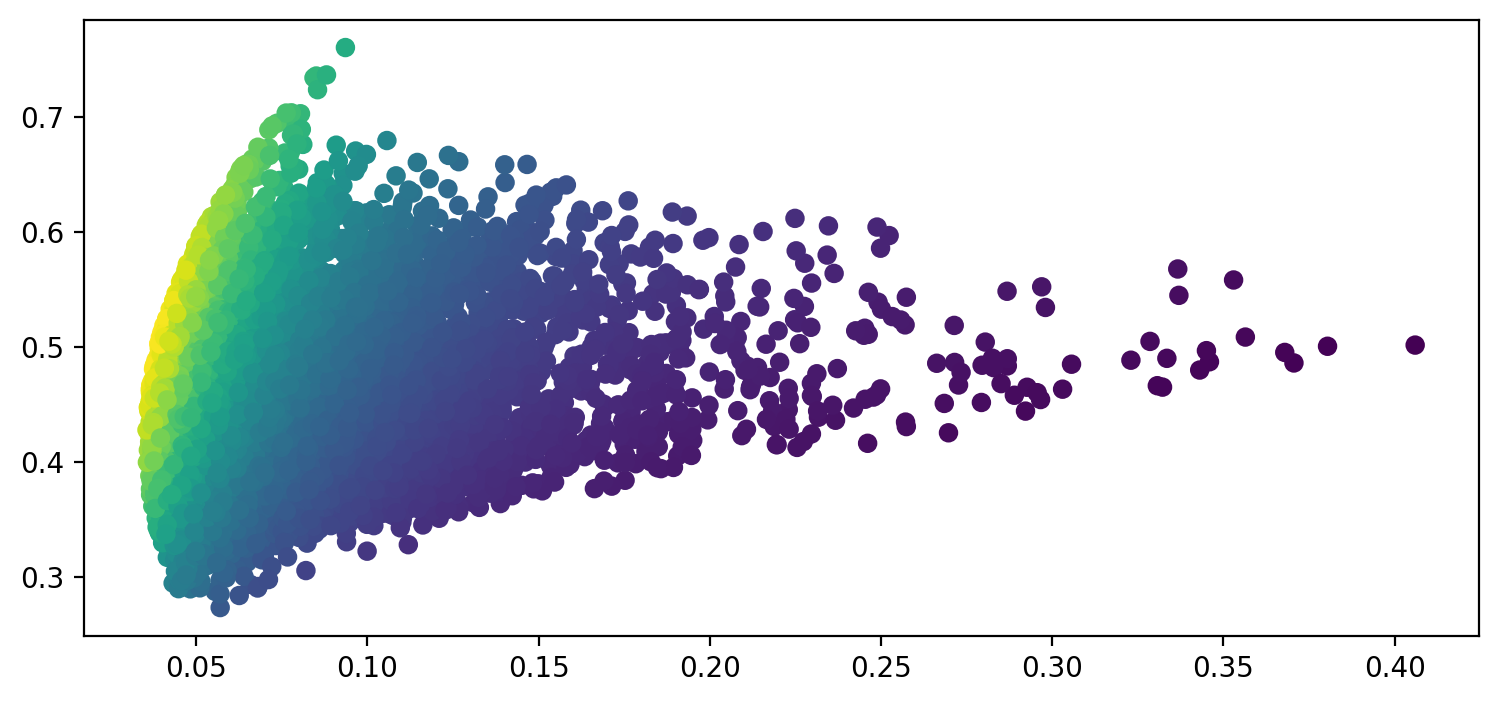

In [49]:
plt.figure(dpi=200,figsize=(9,4))
plt.scatter(volatilityList,returnsList,c=sharpeRatios)

In [61]:
def functionToMinimize(weights):
    return -1 * ((calculateReturns(logReturns,weights) - 0.041)/calculateVolatility(logReturnsCov,weights))

bounds = tuple((0,1)  for x in range(n))
startguess = np.array([1/n for x in range(n)])
sum_constraint = ({'type':'eq','fun':lambda weights:np.sum(weights)-1})

minimize(fun=functionToMinimize,x0=startguess,bounds=bounds,constraints=sum_constraint)


     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -11.81390956190047
           x: [ 2.610e-01  3.182e-01  0.000e+00  4.208e-01]
         nit: 9
         jac: [ 1.077e+01  1.077e+01  1.362e+01  1.077e+01]
        nfev: 47
        njev: 9
 multipliers: [ 1.077e+01]